# Python for bioimage analysis

<div class="custom-button-row">
    <a 
        class="custom-button custom-download-button" href="../../notebooks/04_digital_images_intro/python_for_bioimage_analysis.ipynb" download>
        <i class="fas fa-download"></i> Download this Notebook
    </a>
    <a
    class="custom-button custom-download-button" href="https://colab.research.google.com/github/HMS-IAC/bobiac/blob/gh-pages/colab_notebooks/04_digital_images_intro/python_for_bioimage_analysis.ipynb" target="_blank">
        <img class="button-icon" src="../../_static/logo/icon-google-colab.svg" alt="Open in Colab">
        Open in Colab
    </a>
</div>


In [9]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "bioio",
#     "bioio-nd2",
#     "bioio-tifffile",
#     "imageio",
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "numpy",
#     "rich",
#     "tifffile",
# ]
# ///

## Description
This notebook centers around ```numpy``` array - the most common representation of images in python. 

## Objectives
We learn how to read in images, manipulate them and visualize them as ```numpy``` arrays, and about common pitfalls. 

## Table of Contents
1. Importing libraries
2. Reading images using ```tifffile```
3. View images using ```ndv```
4. ```numpy```: indexing and slicing
5. ```numpy```: multiple channels and z-stacks
6. ```numpy```: generating ```numpy``` arrays
7. Visualize images using ```matplotlib``` (functions) 

## 1. Import all necessary libraries

In [10]:
import matplotlib.pyplot as plt
import ndv
import numpy as np
import tifffile
from bioio import BioImage
from matplotlib.patches import Rectangle
from rich import print

In [34]:
img_path = "../../_static/images/python4bia/confocal-series.tif"

stack = tifffile.imread(img_path)
print(stack.dtype)
print(stack.shape)

uint8

(25, 2, 400, 400)

## 3. View images using `ndv`
```ndv``` documentation: https://pyapp-kit.github.io/ndv/latest/  
Reminder: we imported ```ndv``` using 
```python
import ndv
```

In [12]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

In [13]:
viewer = ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>


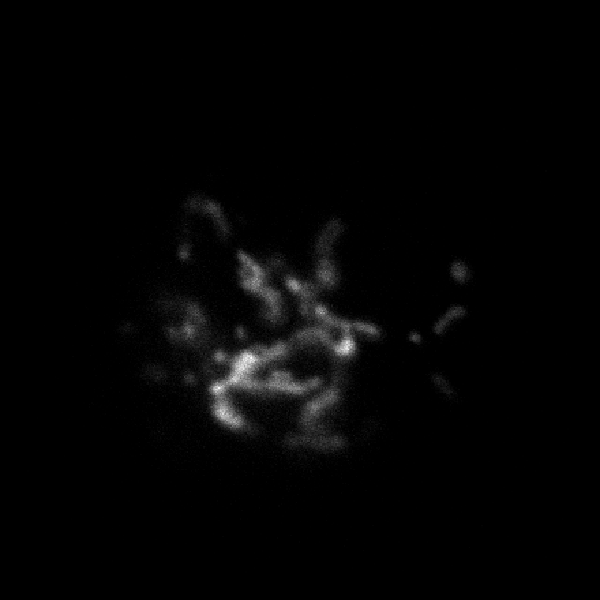

In [14]:
viewer.widget().children[1].snapshot()

## 4. ```numpy``` arrays - indexing and slicing

### 4.1 Load an image

We load image ```cateye_nonsquare_ds.tif```. We can apply the same approach as before 

In [15]:
cat_img_path = "../../_static/images/python4bia/cateye_nonsquare_ds.tif"
cat = tifffile.imread(cat_img_path)

### 4.2 Inspecting ```numpy``` arrays

#### Inspecting raw intensity values

Remember, the image is now a ```numpy``` array.  
The simplest way of viewing its values is by running the following cell:   

In [16]:
cat

array([[217, 176, 226, 253, 150, 226, 228, 220, 210, 218, 224],
       [215, 181, 236, 219, 225, 220, 215, 210, 141, 173, 105],
       [199, 140, 231, 222, 228, 238, 218, 194, 195, 197,  34],
       [206, 202, 236, 240, 213, 218, 192, 249, 244, 240,  52],
       [226, 220, 235, 202, 188,  50, 226, 242, 233, 224,  49],
       [238, 247, 208, 179, 234,  91, 181, 227, 237, 140,  45],
       [230, 164, 234, 176, 182, 233, 237, 209, 176,  51, 192],
       [246,  86, 204, 218, 199, 202, 230, 208,  51,  61, 222],
       [251,  34, 150, 201, 198, 223, 157,  57,  56, 239, 101],
       [249, 131, 111,  62,  48,  53,  67, 110, 223, 129, 140],
       [253, 148, 169, 184, 150, 182, 197, 236, 206, 142, 197],
       [253, 175, 202, 222, 253, 251, 234, 185, 165, 144, 164]],
      dtype=uint8)

We can also use the print function. 

In [17]:
print(cat)

[[217 176 226 253 150 226 228 220 210 218 224]
 [215 181 236 219 225 220 215 210 141 173 105]
 [199 140 231 222 228 238 218 194 195 197  34]
 [206 202 236 240 213 218 192 249 244 240  52]
 [226 220 235 202 188  50 226 242 233 224  49]
 [238 247 208 179 234  91 181 227 237 140  45]
 [230 164 234 176 182 233 237 209 176  51 192]
 [246  86 204 218 199 202 230 208  51  61 222]
 [251  34 150 201 198 223 157  57  56 239 101]
 [249 131 111  62  48  53  67 110 223 129 140]
 [253 148 169 184 150 182 197 236 206 142 197]
 [253 175 202 222 253 251 234 185 165 144 164]]

### 4.3 Inspecting properties of the image

Let's print a few properties of ```cat```

In [18]:
print(f"Type of the image: {type(cat)}")
print(f"Datatype of the image: {cat.dtype}")
print(f"Shape of the image: {cat.shape}")  # Dimensions of the image
print(f"Minimum pixel value: {cat.min()}")  # Min pixel value
print(f"Maximum pixel value: {cat.max()}")  # Max pixel value
print(f"Mean pixel value: {cat.mean():.2f}")  # Average pixel value

Type of the image: <class 'numpy.ndarray'>

Datatype of the image: uint8

Shape of the image: (12, 11)

Minimum pixel value: 34

Maximum pixel value: 253

Mean pixel value: 184.17

### 4.4 Generate a simple plot of the image
Reminder: we imported ```plt``` using  

```python
import matplotlib.pyplot as plt
```

#### Plot using ```plt.imshow()``` 

### Code along: 

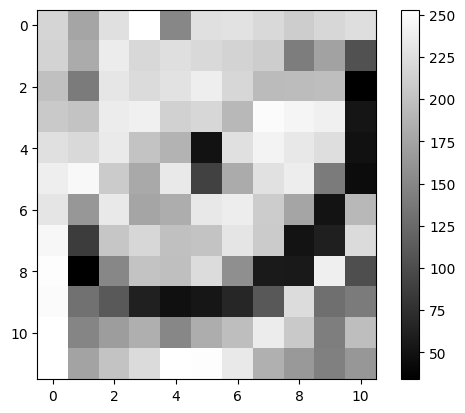

In [19]:
plt.imshow(cat, cmap="gray")
plt.colorbar()
plt.show()

### ✍️ Exercise: Write a plotting function
Write the previous plotting code as a function

In [20]:
def simpleplot(image: np.ndarray) -> None:
    """
    Plot `image` in grayscale with an accompanying colorbar.

    Parameters
    ----------
    image : A 2D np.ndarray
    """
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()

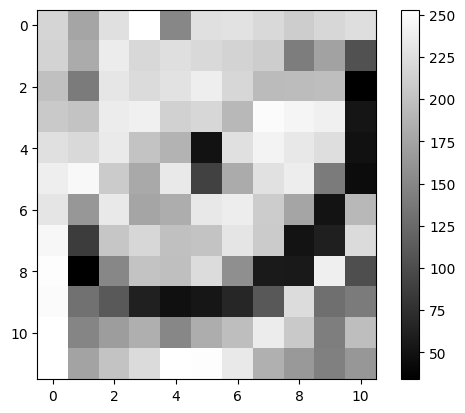

In [21]:
simpleplot(cat)

### 4.5 Plot a simple histogram

In [22]:
print(cat.ravel())  # explain .ravel(). Explain graphically!
print(cat.ravel().shape)  # explain .ravel(). Explain graphically!

[217 176 226 253 150 226 228 220 210 218 224 215 181 236 219 225 220 215
 210 141 173 105 199 140 231 222 228 238 218 194 195 197  34 206 202 236
 240 213 218 192 249 244 240  52 226 220 235 202 188  50 226 242 233 224
  49 238 247 208 179 234  91 181 227 237 140  45 230 164 234 176 182 233
 237 209 176  51 192 246  86 204 218 199 202 230 208  51  61 222 251  34
 150 201 198 223 157  57  56 239 101 249 131 111  62  48  53  67 110 223
 129 140 253 148 169 184 150 182 197 236 206 142 197 253 175 202 222 253
 251 234 185 165 144 164]

(132,)

Text(0, 0.5, 'count')

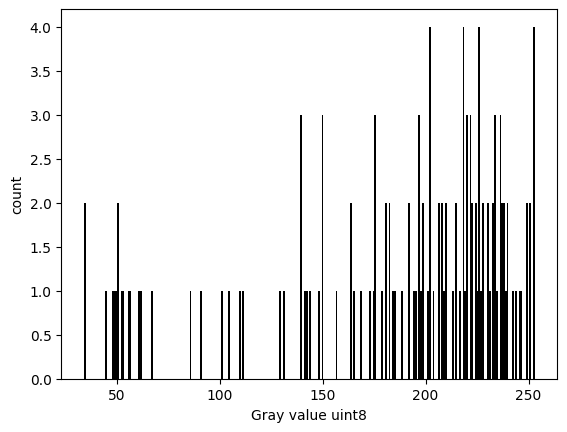

In [23]:
plt.hist(cat.ravel(), bins=256, color="k")
plt.xlabel(f"Gray value {cat.dtype}")  # format string
plt.ylabel("count")

### 4.6 Indexing: individual entries

In [24]:
def valueplot(image: np.ndarray, indices: list | tuple = None) -> None:
    """
    Show a 2-D array as a grayscale heat-map, print each pixel’s value on top,
    and optionally outline one pixel.

    Parameters
    ----------
    image : np.ndarray
        Array of shape (rows, cols).
    indices : sequence of two ints, optional
        (row, col) of the pixel to highlight; negative indices wrap.
    """

    if indices is None:
        indices = [None, None]
    plt.imshow(image, cmap="gray", vmin=np.min(image), vmax=np.max(image))

    # Annotate each pixel with its value
    for i in range(image.shape[0]):  # row
        for j in range(image.shape[1]):  # column
            plt.text(
                j,
                i,
                str(image[i, j]),
                ha="center",
                va="center",
                color="magenta",
                fontsize=10,
            )

    plt.ylabel("row; y; axis = 0")
    plt.xlabel("column; x; axis = 1")

    y, x = indices  # row = y, col = x
    if (
        isinstance(indices, (list, tuple))
        and len(indices) == 2
        and all(isinstance(idx, int) for idx in indices)
    ):
        assert y < image.shape[0], f"value y {y} out of range"
        assert x < image.shape[1], f"value x {x} out of range"

        sign_y = np.sign(y) if y != 0 else 1
        sign_x = np.sign(x) if x != 0 else 1
        y = y % (image.shape[0] - 1)
        x = x % (image.shape[1] - 1)
        rect = Rectangle(
            (x - sign_x * 0.5, y - sign_y * 0.5),
            1,
            1,
            linewidth=2,
            edgecolor="cyan",
            facecolor="none",
        )
        plt.gca().add_patch(rect)

    plt.yticks(list(range(image.shape[0])))
    plt.xticks(list(range(image.shape[1])))
    plt.tight_layout()
    plt.show()

### ✍️ Exercise: Explore indexing of individual entries 

Tip: You can directly index individual entries.  
Or pass variables instead of numbers if the same numbers are to be reused: 

In [25]:
# Pass numbers directly
print(cat[0, 10])

# Define variables
row, col = 0, 10
print(cat[row, col])

224

224

Enter different values for ```row``` and ```col```: 

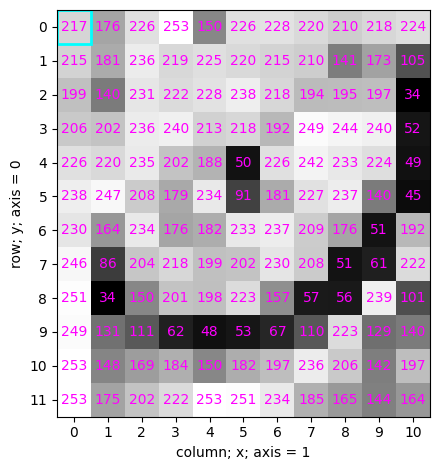

In [26]:
row, col = 0, 10
valueplot(cat, indices=[row, col])

### 4.7 Indexing: slicing rows and columns

### Rows

In [27]:
row = -1
print(cat[row])  # If only one number is supplied, it applies to axis 0
print(cat[row, :])  # This is equivalent

[253 175 202 222 253 251 234 185 165 144 164]

[253 175 202 222 253 251 234 185 165 144 164]

### Columns

In [28]:
print(cat[:, 0])

[217 215 199 206 226 238 230 246 251 249 253 253]

### ✍️ Exercise: 
Print these values

<img align="center" src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/python4bia/figures/python4bia_print_values.png" alt="Print these values" width="300px">


### Solution:

In [29]:
# Show them how to query images. Eva introduced that using lists
# Go slower here!
# draw a representation
print(cat[4:6, 5])

[50 91]

### 4.8 Modifying intensity values using slicing 

### ✍️ Exercise: Make a copy of cat, and name it lazercat (new variable). Assign a value of 255 to the indicated pixels

### Pitfall

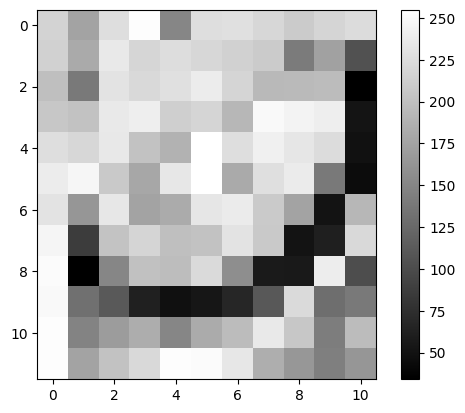

In [30]:
lazercat = cat
lazercat[4:6, 5] = 255
simpleplot(cat)

### ✍️ Exercise: Inspect the pixelvalues cat and lazercat

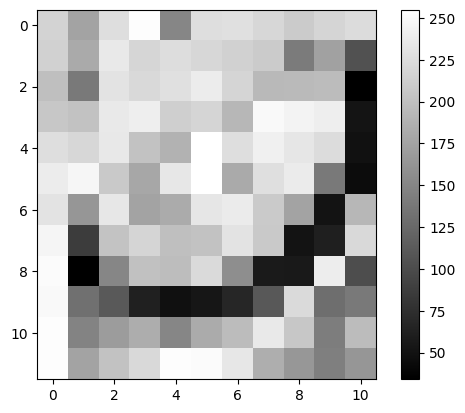

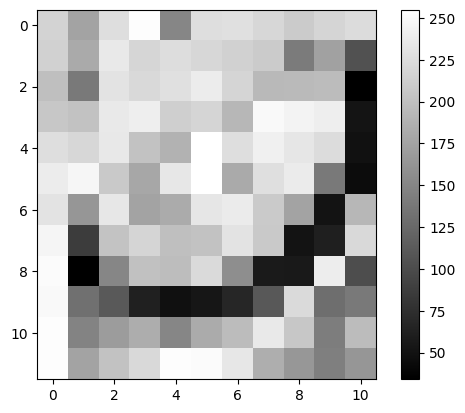

In [31]:
simpleplot(cat)
simpleplot(lazercat)

### Solution:

In [32]:
# reload cat in case it was overwritten
def load_cat() -> np.ndarray:
    cat_img = BioImage("../../_static/images/python4bia/cateye_nonsquare_ds.tif")
    cat = cat_img.data
    cat = cat.squeeze()
    return cat

In [33]:
cat = load_cat()

UnsupportedFileFormatError: BioImage does not support the image: '../../_static/images/python4bia/cateye_nonsquare_ds.tif'. You may need to install an extra format dependency. See our list of known plugins in the bioio README here: https://github.com/bioio-devs/bioio for a list of known plugins. You can also call the 'bioio.plugins.dump_plugins()' method to report information about currently installed plugins or the 'bioio.plugin_feasibility_report(image)' method to check if a specific image can be handled by the available plugins.

In [ ]:
lazercat = cat.copy()
lazercat[4:6, 5] = 255

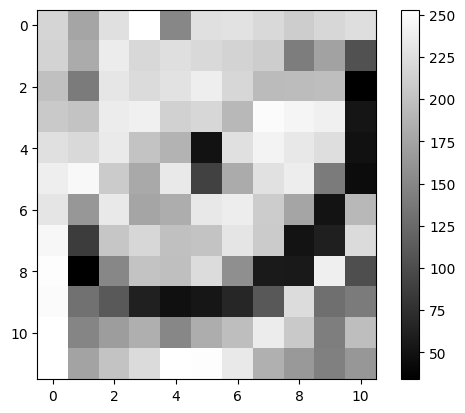

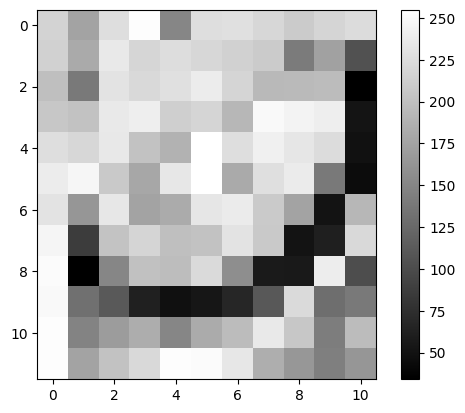

In [ ]:
simpleplot(cat)
simpleplot(lazercat)

### ✍️ Exercise: Make a copy of cat and name it "pirate". Assign to all |pixels but the rim-pixels a value of 0. Plot to verify!

In [ ]:
...

Ellipsis

### Solution:

In [ ]:
# cat = load_cat() # Run if you accidentally overwrote ```cat```

In [ ]:
pirate = cat.copy()

In [ ]:
pirate[1:-1, 1:-1] = 0

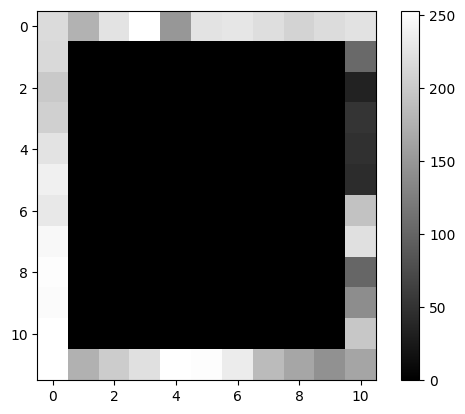

In [ ]:
simpleplot(pirate)

### ✍️ Exercise: Make a copy of cat and name it "monocle". Assign a value of 0 to the rim pixels. Plot to verify
Tip: you don't need a for-loop for this 

In [ ]:
...

Ellipsis

### Solution:

In [ ]:
# cat = load_cat() # Run if you accidentally overwrote ```cat```

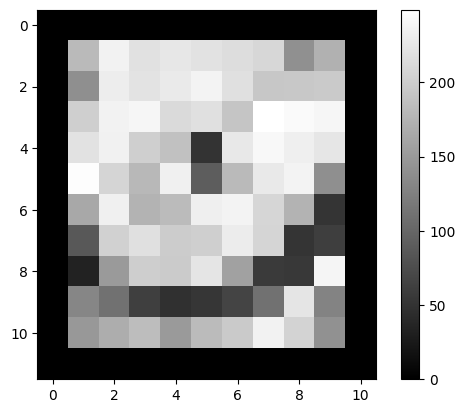

In [ ]:
monocle = cat.copy()
pxvalue = 0
monocle[0, :] = pxvalue
monocle[-1, :] = pxvalue
monocle[:, 0] = pxvalue
monocle[:, -1] = pxvalue

simpleplot(monocle)

### ✍️ Exercise: Make a copy of cat and name it "h_tabby". Assign a value of 0 to every other pixel in y to give it a horizontal stripy pattern 

In [ ]:
# cat = load_cat() # Run if you accidentally overwrote ```cat```

In [ ]:
h_tabby = cat.copy()
ymax = len(cat[0])  # the maximum y value
# for i in range(0, ymax, 2):
#     ...  # fill in the gap

### Solution:

Using a for-loop

In [ ]:
h_tabby = cat.copy()
ymax = cat.shape[0]
for i in range(0, ymax, 2):
    h_tabby[i] = 0

Here is another solution using slicing:

In [ ]:
h_tabby[0:ymax:2] = 0
h_tabby[::2] = 0  # This is equivalent

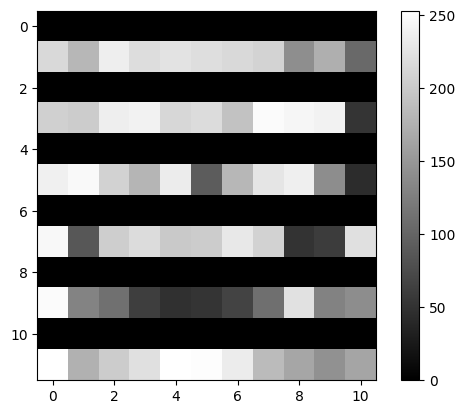

In [ ]:
simpleplot(h_tabby)

### ✍️ Exercise: Make a copy of cat and name it "v_tabby". Assign a value of 0 to every other pixel in y to give it a vertical stripy pattern 
Do not use a for-loop

In [ ]:
# cat = load_cat() # Run if you accidentally overwrote ```cat```

In [ ]:
...

Ellipsis

### Solution:

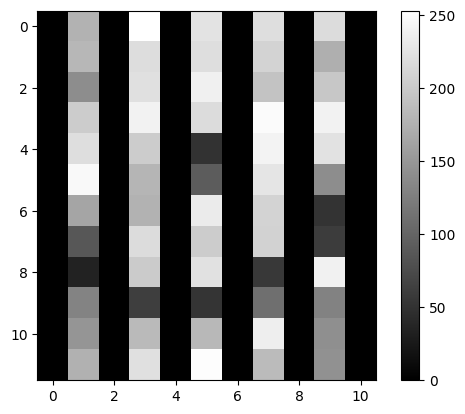

In [ ]:
v_tabby = cat.copy()
v_tabby[:, ::2] = 0
simpleplot(v_tabby)

## 5. ```numpy``` and multichannel/z-stacks


#### Reminder: we ran these lines to extract image stack

In [ ]:
def read_img(
    path: str = "../../_static/images/python4bia/confocal-series.tif",
) -> np.ndarray:
    img = tifffile.imread(path)
    return img

In [ ]:
stack = read_img()

In [ ]:
print(stack.dtype)
print(stack.shape)

uint8

(25, 2, 400, 400)

#### Reminder: You can use ndv to inspect the image

In [ ]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

In [ ]:
viewer = ndv.imshow(stack)  # tags: remove-input, remove-output

RFBOutputContext()

<IPython.core.display.Javascript object>


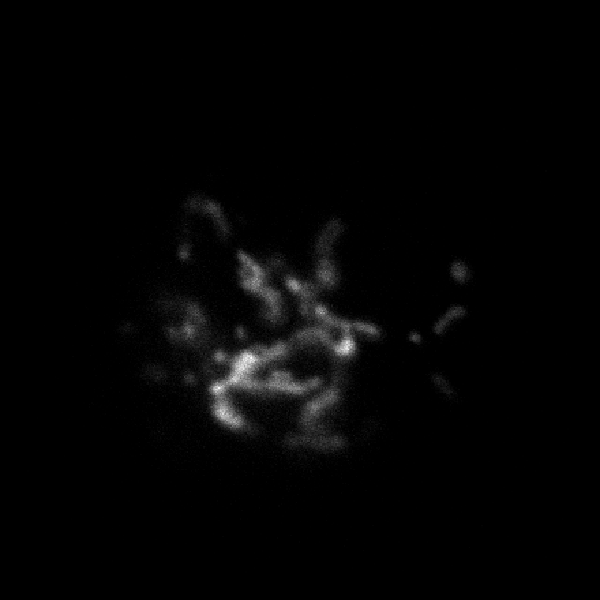

In [ ]:
viewer.widget().children[1].snapshot()  # tags: remove-input

### ✍️ Exercise: Save the first channel of stack as ch0, and the second as ch1

In [ ]:
...

Ellipsis

### Solution:

In [ ]:
ch0 = stack[:, 0].copy()
ch1 = stack[:, 1].copy()

In [ ]:
print(ch0.shape)

(25, 400, 400)

### ✍️ Exercise: plot ch0 using function ```simpleplot()```

In [ ]:
...

Ellipsis

### Pitfalls: 

In [ ]:
# simpleplot(ch0)

In [ ]:
ch0

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Solution: 
simpleplot can only plot a 2D array. 
You must index ch0 such that it returns a 2D array. Examples: 

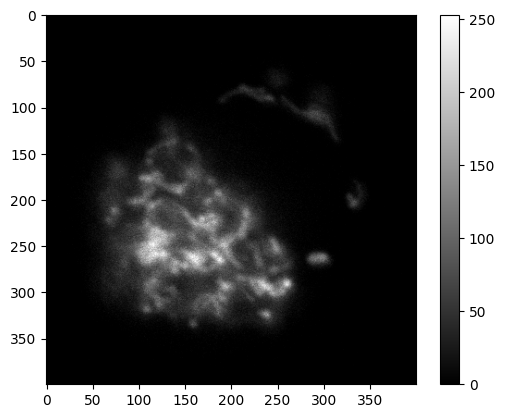

In [ ]:
z = 17

simpleplot(ch0[z])  # show only one z-plane

In [ ]:
ch0.shape

(25, 400, 400)

### ✍️ Exercise: **Create a mean-projection of channel `ch0`**

**Objective**
Convert the 3-D stack `ch0` (shape `(Z, 400, 400)`) into a 2-D image by averaging over its *z*-planes.



Quick reference [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html): 


```python
numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)

```

**a** (`array_like`) – Array containing numbers whose mean is desired. If a is not an array, a conversion is attempted.  
**axis** (`int`, `tuple[int]`, or `None`) – Axis or axes along which the means are computed. The default is to compute the mean of the flattened array.


In [ ]:
# mean_project_ch0 = np.mean(...)  # fill in the gaps

# # test your result
# assert mean_project_ch0.shape == (400, 400), (
#     f"Your output shape is {mean_project_ch0.shape}, but should be (400, 400)"
# )
# print(mean_project_ch0.shape)
# simpleplot(mean_project_ch0)

### Solution:

(400, 400)

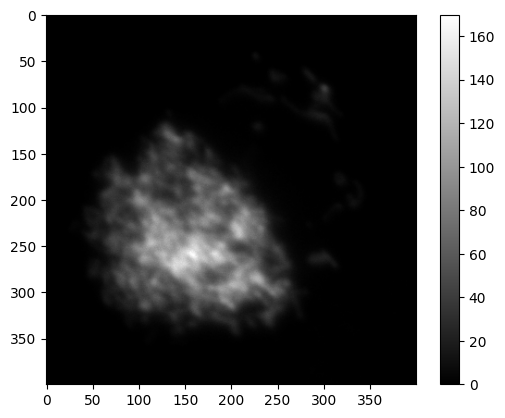

In [ ]:
mean_project_ch0 = np.mean(ch0, axis=0)

# test your result
assert mean_project_ch0.shape == (400, 400), (
    f"Your output shape is {mean_project_ch0.shape}, but should be (400, 400)"
)

print(mean_project_ch0.shape)
simpleplot(mean_project_ch0)

### ✍️ Exercise: compute the max projection of ch0
Collapse ch0 into a 2D image by only displaying the maximum value along z. 
The result should be a (400, 400) array where each value represents the maximum of the all z intensity values at that position.  
This is called max projection

Tip: https://numpy.org/doc/2.2/reference/generated/numpy.max.html#numpy-max

### Solution:

(400, 400)

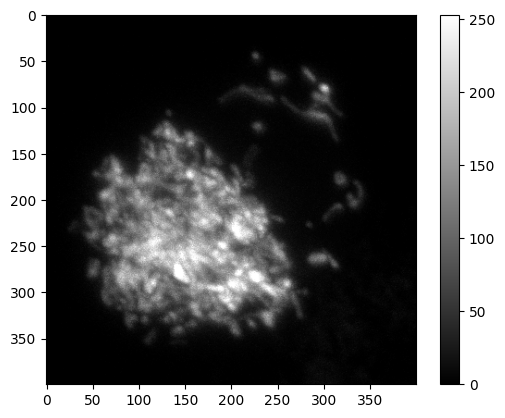

In [ ]:
max_project_ch0 = np.max(ch0, axis=0)

# test your result
assert max_project_ch0.shape == (400, 400), (
    f"Your output shape is {max_project_ch0.shape}, but should be (400, 400)"
)

print(max_project_ch0.shape)
simpleplot(max_project_ch0)

### ✍️ Exercise (bonus): Try other ```numpy``` projections

Below are a few operations taken from 
https://numpy.org/doc/2.2/reference/routines.statistics.html 


| Category                 | Function        | What it does along an axis         | Example projection (`axis=0`)                                   |
| ------------------------ | --------------- | ---------------------------------- | --------------------------------------------------------------- |
| **Order statistics**     | `np.percentile` | q-th percentile                    | `p50 = np.percentile(stack, 50, axis=0)` ([numpy.org][1])       |
|                          | `np.quantile`   | q-th quantile (fraction 0-1)       | `q25 = np.quantile(stack, 0.25, axis=0)` ([numpy.org][1])       |
| **Averages & variances** | `np.median`     | Median                             | `med = np.median(stack, axis=0)` ([numpy.org][1])               |
|                          | `np.average`    | Weighted average (pass `weights=`) | `w_avg = np.average(stack, axis=0, weights=w)` ([numpy.org][1]) |
|                          | `np.mean`       | Arithmetic mean                    | `mean = np.mean(stack, axis=0)` ([numpy.org][1])                |
|                          | `np.std`        | Standard deviation                 | `sigma = np.std(stack, axis=0)` ([numpy.org][1])                |
|                          | `np.var`        | Variance                           | `var_map = np.var(stack, axis=0)` ([numpy.org][1])              |

[1]: https://numpy.org/doc/stable/reference/routines.statistics.html "Statistics — NumPy v2.3 Manual"


## 6. Generating ```numpy``` arrays

There are many reasons to generate```numpy```arrays 
* You may need it as a basis for further computations
* You want to generate dummy data to test something quickly 

### Create an array of 0s with shape [3, 2, 2]

In [ ]:
zeroes = np.zeros([3, 2, 2])
print(zeroes)
zeroes.dtype

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

dtype('float64')

#### Create an empty array of integers with shape [3, 2, 2]

In [ ]:
empty_int = np.empty([3, 2, 2], dtype=int)

#### Assign a value of 1 to [0,0,0]. Assign a value of 2.2 to [0,0,1]

In [ ]:
empty_int[0, 0, 0] = 1
empty_int[0, 0, 1] = 2.2

In [ ]:
print(empty_int)
print(empty_int.dtype)

[[[1 2]
  [0 0]]

 [[0 0]
  [0 0]]

 [[0 0]
  [0 0]]]

int64

### Generate an array of zeroes that has the same properties as cat

In [ ]:
zeroes_cat = np.zeros_like(cat)

In [ ]:
print(zeroes_cat)
print(zeroes_cat.dtype)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]

uint8

## Simulate a multichannel image 
* Call it ```dual_ch_fake```
* Of shape [2,9, 10]
* Same dtype as ```cat```
* Each pixel has a random value between 0 and 256 (exclusive)

Documentation: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html 

In [ ]:
# dual_ch_fake = np.random.randint(...)

### Solution:

In [ ]:
dual_ch_fake = np.random.randint(0, 256, size=(2, 9, 10), dtype=np.uint8)

Let's plot the two channels:

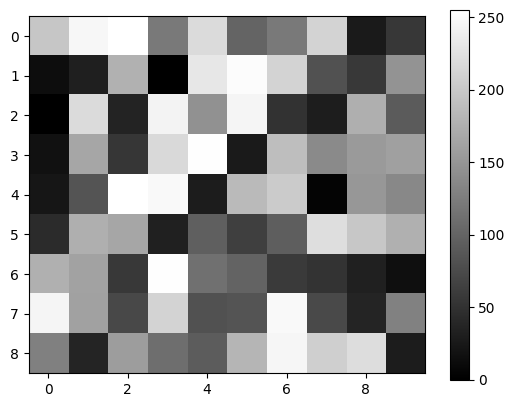

In [ ]:
simpleplot(dual_ch_fake[0, :, :])

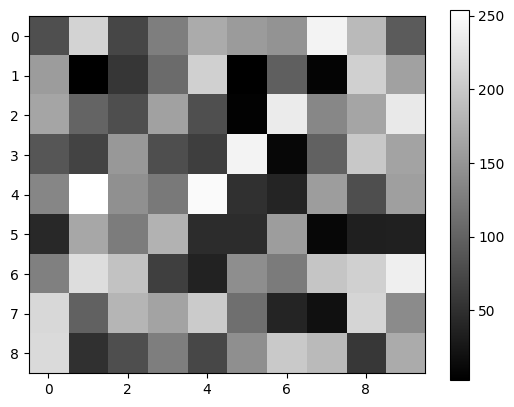

In [ ]:
simpleplot(dual_ch_fake[1, :, :])

### ✍️ Exercise: sanity-check whether np.mean does what you expect it to do without using```numpy```

Reminder: You can calculate a mean image of the two channels like this: 

In [ ]:
mean_of_channels = np.mean(dual_ch_fake, axis=0)

And generate an array of each channel like this: 

In [ ]:
ch_0 = dual_ch_fake[0, :, :].copy()
ch_1 = dual_ch_fake[1, :, :].copy()

### Pitfall

In [ ]:
mean_of_channels == (ch_0 + ch_1) / 2  # integer overflow

array([[False, False, False,  True, False,  True, False, False,  True,
         True],
       [ True,  True,  True,  True, False,  True, False,  True, False,
        False],
       [ True, False,  True, False,  True,  True, False,  True, False,
        False],
       [ True,  True,  True, False, False, False,  True,  True, False,
        False],
       [ True, False, False, False, False,  True,  True,  True,  True,
        False],
       [ True, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True, False,  True,  True,  True,  True,  True,
         True],
       [False, False,  True, False, False,  True, False,  True,  True,
        False],
       [False,  True,  True,  True,  True, False, False, False, False,
         True]])

### Possible solution:

In [ ]:
mean_manual = dual_ch_fake[0, :, :] / 2 + dual_ch_fake[1, :, :] / 2

In [ ]:
mean_of_channels == mean_manual

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

verify all values are True

In [ ]:
np.unique(mean_of_channels == mean_manual)

array([ True])

## 7. Visualization using ```matplotlib```

In [ ]:
def show_2_channels(image):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    for i in range(2):
        im = axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].set_title(f"Channel {i}")
        axes[i].axis("off")
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

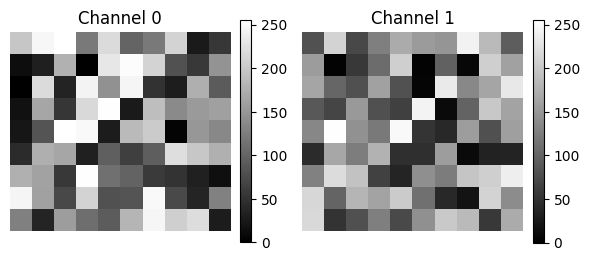

In [ ]:
show_2_channels(dual_ch_fake)

### ✍️ Exercise: plot all channels of the following image. Write a function show_all_channels().

In [ ]:
threechannel = np.random.randint(0, 256, size=(3, 5, 5), dtype=np.uint8)

In [ ]:
np.shape(threechannel)[0]

3

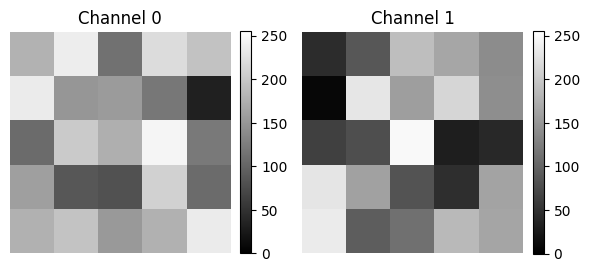

In [ ]:
show_2_channels(threechannel)

In [ ]:
def show_all_channels(image, n_channels=None):
    if not n_channels:
        nchannels = np.shape(image)[0]
    fig, axes = plt.subplots(1, nchannels, figsize=(6, 3))
    for i in range(nchannels):
        im = axes[i].imshow(
            image[
                i,
                :,
            ],
            cmap="gray",
            vmin=0,
            vmax=255,
        )
        axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].set_title(f"Channel {i}")
        axes[i].axis("off")
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

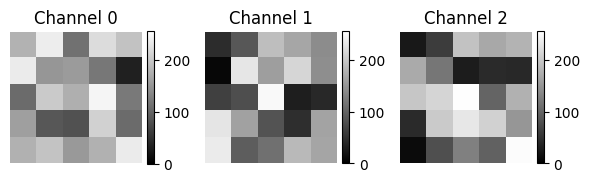

In [ ]:
show_all_channels(threechannel)

## 8. Bonus: read images using ```bioio```

### ```bioio``` can read various image file formats
There are many ways of reading image files. 
[bioio](https://github.com/bioio-devs/bioio)
can read images of different file-formats.  
Different fileformats require different [plugins](https://github.com/bioio-devs/bioio) 


We use [bioio-tifffile](https://github.com/bioio-devs/bioio-tifffile) to read tiff files.  

We have already installed ```bioio-tifffile``` to this jupyter notebook by using 

`juv add python_for_bioimage_analysis.ipynb bioio-tifffile`

You can find it at the top of the notebook.  

### Example: Read a tif file using ```bioio```
```bioio``` documentation: https://bioio-devs.github.io/bioio/OVERVIEW.html  
Reminder: we imported the relevant packages using 

```python
from bioio import BioImage
import bioio_tifffile
```


```bioio``` loads the image and metadata into a container. We name the container ```img```

In [ ]:
img_path = "../../_static/images/python4bia/confocal-series.tif"
img = BioImage(img_path)

In [ ]:
type(img)

bioio.bio_image.BioImage

### ✍️ Exercise: try out operations on img
Below are a few examples of operations on img. taken from [here](https://github.com/bioio-devs/bioio).  
Try out a few of the operations  

```python 
## Operations 

# Get a BioImage object
img = BioImage("my_file.tiff")  # selects the first scene found
img.data  # returns 5D TCZYX ```numpy``` array
img.xarray_data  # returns 5D TCZYX xarray data array backed by numpy
img.dims  # returns a Dimensions object
img.dims.order  # returns string "TCZYX"
img.dims.X  # returns size of X dimension
img.shape  # returns tuple of dimension sizes in TCZYX order
img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array

```

### Possible solutions:

In [ ]:
img.dims.order

'TCZYX'

In [ ]:
img.dims  # Notice how the order is different than when using tifffile to load the image!

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

In [ ]:
img.shape

(1, 2, 25, 400, 400)

### Extract a ```numpy``` array from the BioImage object

[numpy documentation](https://numpy.org/doc/stable/)

Reminder: we imported ```numpy``` as follows: 
```python
import numpy as np
```

In [ ]:
# the image is contained in img.data
stack = img.data

In [ ]:
type(stack)  # verify it's a numpy array

numpy.ndarray

In [ ]:
stack.dtype  # check the datatype

dtype('uint8')

### Inspect dimensions of ```stack```

In [ ]:
print(img.dims)  # Reminder:
print(stack.shape)  # only one time-point. This is like a movie with only one frame!

<Dimensions [T: 1, C: 2, Z: 25, Y: 400, X: 400]>

(1, 2, 25, 400, 400)

### Use ```.squeeze()``` to remove axes of length one

To test these concepts, we first generate an array **without** an axis of size one:

In [ ]:
simple_list = [1, 2, 3]
simple_array = np.array(simple_list)  # Turn the list into a numpy array

# print a few properties of simple_array
print(type(simple_array))
print(simple_array)
print(simple_array.shape)

<class 'numpy.ndarray'>

[1 2 3]

(3,)

Now, generate an array **with** an axis of length one:

In [ ]:
nested_list = [[1, 2, 3]]  # There's extra brackets!
nested_array = np.array(nested_list)

# print a few properties of nested_array
print(type(simple_array))
print(nested_array)
print(nested_array.shape)

<class 'numpy.ndarray'>

[[1 2 3]]

(1, 3)

Next, ```.squeeze()``` removes axes of length one: 

In [ ]:
nested_array_squeezed = nested_array.squeeze()

# print a few properties of nested_array_squeezed
print(type(nested_array_squeezed))
print(nested_array_squeezed)
print(nested_array_squeezed.shape)

<class 'numpy.ndarray'>

[1 2 3]

(3,)

### ✍️ Exercise: apply this to `stack` and print its shape

In [ ]:
stack = stack.squeeze()

In [ ]:
print(
    stack.shape
)  # Notice how the order is different than when using tifffile to load the image!

(2, 25, 400, 400)

Congratulations! ```stack``` is now in the correct format to be viewed and modified! 

### ✍️ Exercise: extract a ```numpy``` array from cat_img. Call it ```cat```. Remove axes of size one from ```cat```

In [ ]:
...

Ellipsis

### Solution: 

In [ ]:
cat_img_path = "../../_static/images/python4bia/cateye_nonsquare_ds.tif"
cat_img = BioImage(cat_img_path)

In [ ]:
cat_img.dims

<Dimensions [T: 1, C: 1, Z: 1, Y: 12, X: 11]>

In [ ]:
cat = cat_img.data  # cat is now a numpy array

In [ ]:
cat.shape

(1, 1, 1, 12, 11)

In [ ]:
cat = cat.squeeze()  # remove empty dimensions
cat.shape

(12, 11)

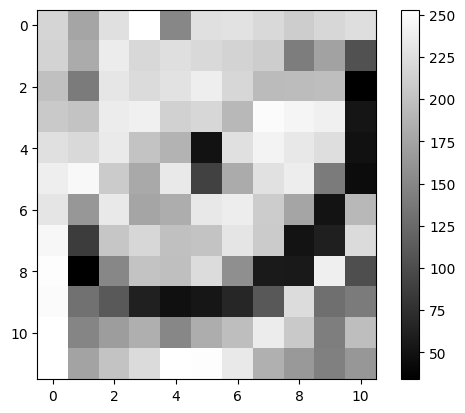

In [ ]:
simpleplot(cat)